### Generating Character Targets:

In this notebook I creatr lists from the input data save it as character lists to add options for targets while feeding a model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa.display as ld
import librosa
import re

In [3]:
train = pd.read_csv('./Directories/Train.csv')

In [4]:
train

,Unnamed: 0,index,File,Sentece
0,0,0,/home/houston/Desktop/General_Assembly/CapSton...,"['GOOD', 'MEN', 'AND', 'BAD', 'MEN', 'UNDOUBTE..."
1,1,1,/home/houston/Desktop/General_Assembly/CapSton...,"['AND', 'LIVED', 'THEIR', 'LIVES', 'IN', 'THAT..."
2,2,2,/home/houston/Desktop/General_Assembly/CapSton...,"['WITH', 'THE', 'GREATEST', 'PROFIT', 'AND', '..."
3,3,3,/home/houston/Desktop/General_Assembly/CapSton...,"['A', 'TALL', 'SLIM', 'FELLOW', 'WHO', 'KNEW',..."
4,4,4,/home/houston/Desktop/General_Assembly/CapSton...,"['ROVED', 'OVER', 'EUROPE', 'AND', 'THRIVED', ..."
...,...,...,...,...
257854,257854,89,/home/houston/Desktop/General_Assembly/CapSton...,"['I', 'SUPPOSE', 'I', 'MUST', 'HAVE', 'BEEN', ..."
257855,257855,90,/home/houston/Desktop/General_Assembly/CapSton...,"['I', 'FEEL', 'CONVINCED', 'IN', 'MY', 'MIND',..."
257856,257856,91,/home/houston/Desktop/General_Assembly/CapSton...,"['AND', 'I', 'HAVE', 'OFTEN', 'BOASTED', 'THAT..."
257857,257857,92,/home/houston/Desktop/General_Assembly/CapSton...,"['I', 'AM', 'NOW', 'A', 'FAIR', 'LATIN', 'SCHO..."


In [5]:
train.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

In [6]:
y, sr = librosa.load(train.loc[0]['File'], sr=None)

In [7]:
sr

16000

In [8]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)))

In [9]:
D

array([[-27.15298 , -29.716158, -38.482742, ..., -27.547497, -38.482742,
        -23.036211],
       [-30.891226, -33.581535, -37.419235, ..., -23.378725, -22.837315,
        -26.373835],
       [-38.482742, -38.482742, -36.71958 , ..., -21.88176 , -22.14613 ,
        -35.109463],
       ...,
       [-38.482742, -38.482742, -38.482742, ..., -38.482742, -38.482742,
        -38.482742],
       [-38.482742, -38.482742, -38.482742, ..., -38.482742, -38.482742,
        -38.482742],
       [-38.482742, -38.482742, -38.482742, ..., -38.482742, -38.482742,
        -38.482742]], dtype=float32)

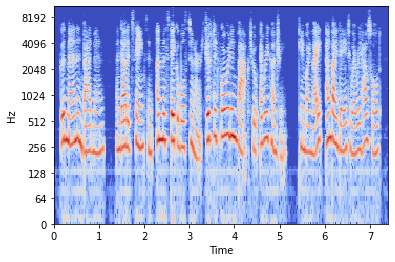

In [10]:
ld.specshow(D, y_axis='log', x_axis='time');


In [11]:
D.shape

(1025, 319)

In [12]:
y, sr = librosa.load(train.loc[1]['File'], sr=None)

In [13]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)))

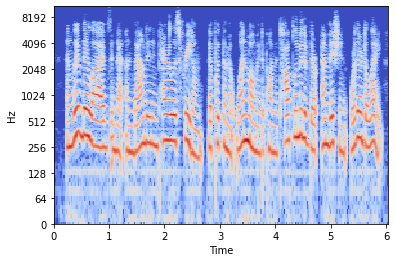

In [14]:
ld.specshow(D, y_axis='log', x_axis='time');


In [15]:
D.shape

(1025, 260)

In [16]:
D.T.shape

(260, 1025)

In [17]:
D[:, 1].shape

(1025,)

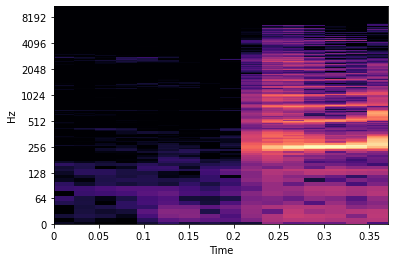

In [18]:
ld.specshow(D[:,0:16], y_axis='log', x_axis='time');

In [19]:
# Feed D[:, X] as each X (Roughly 300 per sample) retrieve letters
word_list = []
for i, j in train.iterrows():
    word_list.append(train['Sentece'][i])

In [47]:
[train['Sentece'][0].strip("[],'").split(',')[0][0:-1]] + [i[2:-1] for i in train['Sentece'][0].strip("[],'").split(',')[1:-1]] + [train['Sentece'][0].strip("[],'").split(',')[-1][2:]]

['GOOD',
 'MEN',
 'AND',
 'BAD',
 'MEN',
 'UNDOUBTED',
 'SAINTS',
 'AND',
 'UNMISTAKABLE',
 'SINNERS',
 'DRIFTED',
 'FORWARD',
 'AND',
 'BACK',
 'THROUGH',
 'EVERY',
 'COUNTRY',
 'CAME',
 'BY',
 'NIGHT',
 'AND',
 'BY',
 'DAY',
 'TO',
 'EVERY',
 'HOUSEHOLD']

In [56]:
train['Sentences_Fixed'] = [' '] * len(train)
for i in range(len(train)):
    train['Sentences_Fixed'][i] = [train['Sentece'][i].strip("[],'").split(',')[0][0:-1]] + [i[2:-1] for i in train['Sentece'][i].strip("[],'").split(',')[1:-1]] + [train['Sentece'][i].strip("[],'").split(',')[-1][2:]]

In [61]:
' '.join(train['Sentences_Fixed'][0])

'GOOD MEN AND BAD MEN UNDOUBTED SAINTS AND UNMISTAKABLE SINNERS DRIFTED FORWARD AND BACK THROUGH EVERY COUNTRY CAME BY NIGHT AND BY DAY TO EVERY HOUSEHOLD'

In [93]:
train['Sentence_Characters'] = ''

for i in range(len(train)):
    train['Sentence_Characters'][i] = (' '.join(train['Sentences_Fixed'][i])+'^')

In [112]:
def process(file_path):
    """
    Creates csv file from filepath with 
    """
    df = pd.read_csv(file_path)
    file = file_path[:-4] + '_finished.csv'
    try:
        df.drop('Unnamed: 0', axis=1, inplace=True)
    except:
        pass
    try:
        df.drop('index', axis=1, inplace=True)
    except:
        pass
    df['Sentences_Fixed'] = [' '] * len(df)
    for i in range(len(df)):
        df['Sentences_Fixed'][i] = [df['Sentece'][i].strip("[],'").split(',')[0][0:-1]] + [i[2:-1] for i in df['Sentece'][i].strip("[],'").split(',')[1:-1]] + [df['Sentece'][i].strip("[],'").split(',')[-1][2:]]
    
    
    df['Sentence_Characters'] = ''

    for i in range(len(df)):
        df['Sentence_Characters'][i] = (' '.join(df['Sentences_Fixed'][i])+'^')
    
    df['Character_Labels'] = [' ']* len(df)
    
    for i in range(len(df)):
        df['Character_Labels'][i] =  [c for c in df['Sentence_Characters'][i]]
    
    df.to_csv(file, index=False)

In [95]:
char_sets = [set(train['Sentence_Characters'][i]) for i, j in train.iterrows()]

In [96]:
char_list = [list(i) for i in char_sets]

In [97]:
single_list_characters = []
for i in char_list:
    for j in i:
        single_list_characters.append(j)

In [98]:
## Number of outputs to use in softmax out

len(set(single_list_characters))

30

In [ ]:
single_list_characters

In [113]:
process('./Directories/Test.csv')

In [117]:
process('./Directories/Train.csv')

In [118]:
process('./Directories/Dev.csv')